In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('synthetic_vehicle_safety_data.csv')
data

,Vehicle_Speed,Object_Distance,Object_Velocity,Object_Type,Weather_Condition,Road_Condition,Safety,Unnamed: 7
0,57.454012,7.985773,32.101582,0,1,1,0,58.801533
1,115.071431,65.458989,4.206998,1,1,0,0,118.506147
2,93.199394,34.863818,8.081436,2,0,1,1,95.456527
3,79.865848,53.314216,44.927709,2,2,0,1,79.098169
4,35.601864,91.218815,30.321453,2,1,1,1,35.903066
...,...,...,...,...,...,...,...,...
95,69.379560,38.174910,26.112163,1,1,0,1,65.749785
96,72.273283,73.965789,38.499678,2,0,0,1,67.707261
97,62.754102,90.225475,10.791051,0,0,0,1,57.779604
98,22.541913,89.273210,31.144524,0,1,0,1,19.787991


In [11]:
if 'Unnamed: 7' in data.columns:
    data = data.drop(columns=['Unnamed: 7'])

In [12]:
x=data.drop(columns=['Safety'])

In [13]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [14]:
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [15]:
data['Cluster']=kmeans.labels_

In [16]:
data.to_csv('clustered_vehicle_data.csv', index=False)

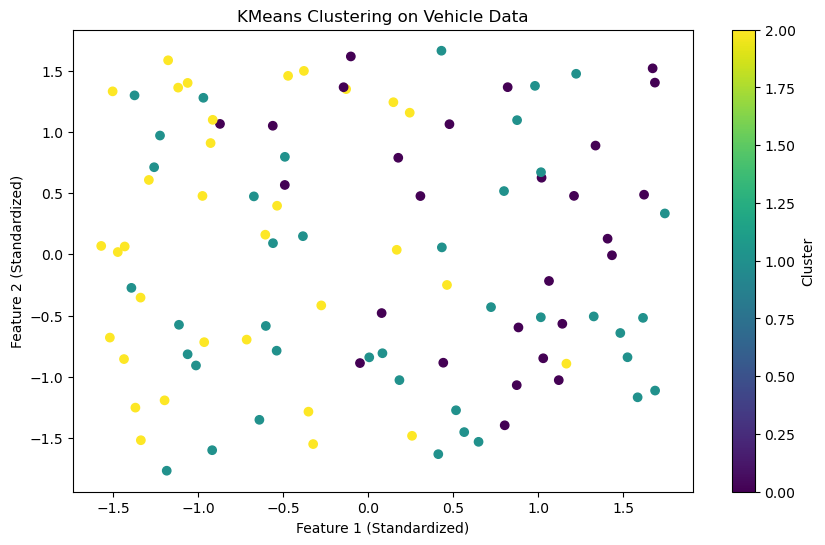

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('KMeans Clustering on Vehicle Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.colorbar(label='Cluster')
plt.show()